In [1]:
import os
from pathlib import Path
from PIL import Image
from matplotlib import pyplot as plt

import numpy as np
from ultralytics import YOLO
import cv2

In [99]:
vidos = "/vol2/KSH/NEW/KSH/DATASET_PROD/gis-kops/nng_tkrs_noyabrsk_srv01_camera_in_interesting_position-debug_case_24-08-18_20-01-25_20-01-55_null_cam13.mp4"
path_to_imgs = "/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/imgs/"
path_to_save = "/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/imgs_w_masks/"

model = YOLO("/home/popovpe/.pyenv/runs/detect/proc/n_seg_19.11/best.pt")

## GET AVER KOPS MASK


0: 640x640 (no detections), 7.5ms
Speed: 9.4ms preprocess, 7.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 5.0ms
Speed: 2.2ms preprocess, 5.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 4.9ms
Speed: 2.4ms preprocess, 4.9ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 5.0ms
Speed: 2.1ms preprocess, 5.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_1_end, 5.7ms
Speed: 2.1ms preprocess, 5.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_1_end, 4.9ms
Speed: 2.0ms preprocess, 4.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_1_end, 2 kopss, 1 kops_tros, 5.2ms
Speed: 2.0ms preprocess, 5.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
(640, 640, 4)
(640, 640, 4)

0: 640x640 1 pipe_1_end, 1 kops, 1 kops_t

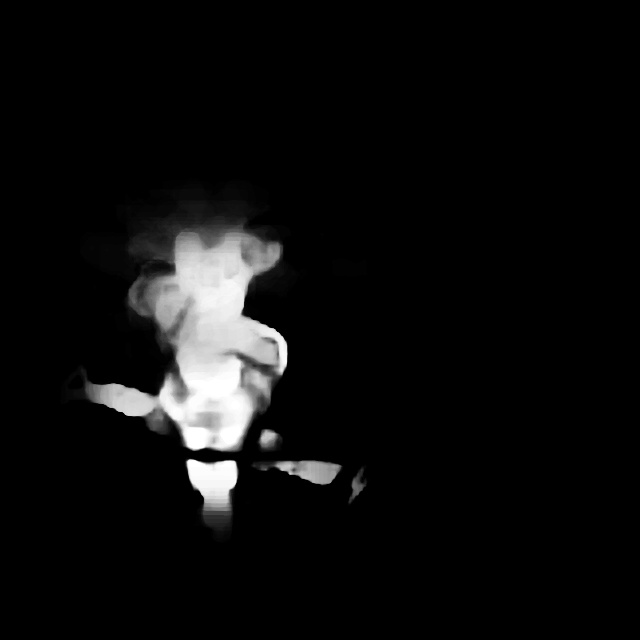

In [12]:
skip_num = 5

n = 0
avg_mask = np.zeros(shape=(640, 640, 1), dtype=int)
for img_path in sorted(os.listdir(path_to_imgs)):
    img = cv2.imread(path_to_imgs+img_path)
    #print(img)
    h, w, rgb = img.shape
    ret = model(img[:, (w - h) // 2:(w + h) // 2, :], conf=0.25)
    label = ret[0]
    annotated_frame = ret[0].plot()
    clss = label.boxes.cls.cpu().numpy().astype(dtype=int)
    confs = label.boxes.conf.cpu().numpy()
    xywh = label.boxes.xywh.cpu().numpy()

    for i, cls in enumerate(clss):
        if cls == 3:
            mask = ret[0].masks.data.cpu().numpy().astype(int).transpose(1, 2, 0)
            mask*=255
            print(mask.shape)
            #if mask.shape[2] > 1:
            #cv2.imwrite(path_to_save+img_path, mask[:, :, i:i+1])
            avg_mask+=mask[:, :, i:i+1]
            n+=1
avg_mask//=n
cv2.imwrite(path_to_save+"avg_mask.jpg", avg_mask)
Image.open("/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/imgs_w_masks/avg_mask.jpg")

## AVER IMG

(array([233, 233, 233, ..., 510, 510, 510]), array([230, 230, 230, ..., 225, 225, 225]), array([0, 1, 2, ..., 0, 1, 2]))


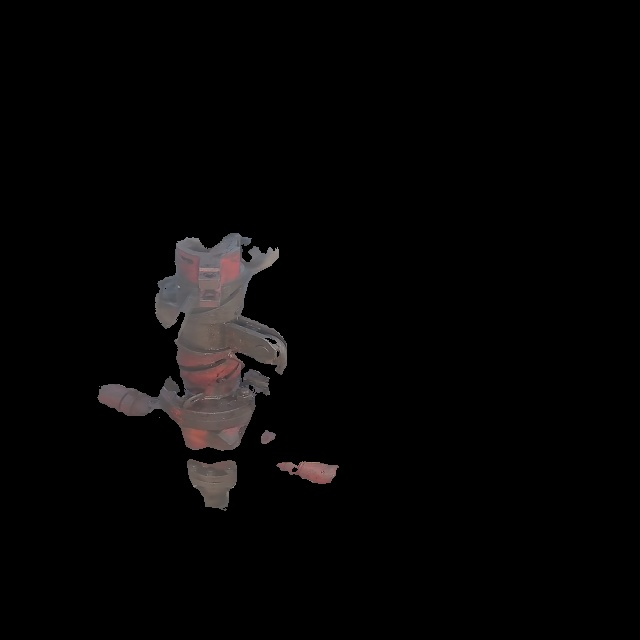

In [108]:

#OLD
skip_num = 5

n = 0
avg_img = np.zeros(shape=(640, 640, 3), dtype=int)
mask = cv2.imread("/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/imgs_w_masks/avg_mask.jpg")
inds = np.where(mask > 127)
print(inds)
for img_path in sorted(os.listdir(path_to_imgs)):
    img = cv2.imread(path_to_imgs+img_path)
    h, w, rgb = img.shape
    img = img[:, (w - h) // 2:(w + h) // 2, :]
    img = cv2.resize(img, (640, 640), interpolation=cv2.INTER_CUBIC)
    avg_img[inds] += img[inds]
    n+=1
    
    
avg_img//=n
cv2.imwrite(path_to_save+"avg_img.jpg", avg_img)
Image.open("/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/imgs_w_masks/avg_img.jpg")


0: 640x640 (no detections), 4.7ms
Speed: 2.1ms preprocess, 4.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 5.5ms
Speed: 2.1ms preprocess, 5.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 5.0ms
Speed: 2.0ms preprocess, 5.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 5.5ms
Speed: 2.2ms preprocess, 5.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_1_end, 5.0ms
Speed: 2.9ms preprocess, 5.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_1_end, 5.0ms
Speed: 2.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_1_end, 2 kopss, 1 kops_tros, 5.4ms
Speed: 2.1ms preprocess, 5.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pipe_1_end, 1 kops, 1 kops_tros, 5.0ms
Speed: 2.4ms prep

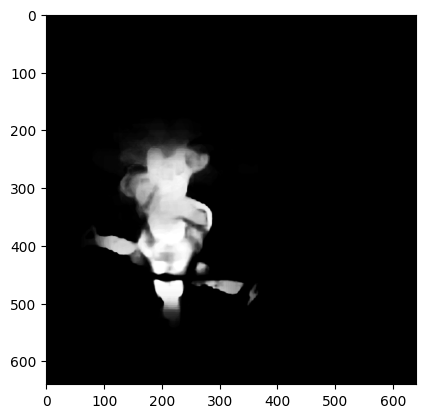

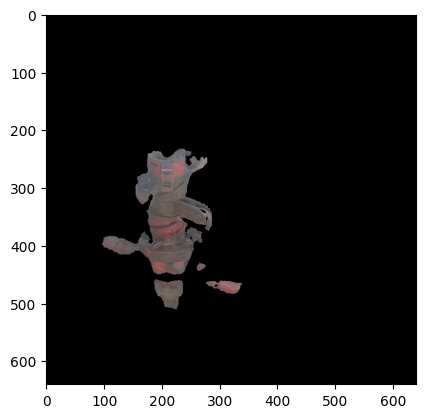

In [114]:
# NEW
from ultralytics import YOLO
model = YOLO("/home/popovpe/.pyenv/runs/detect/proc/n_seg_19.11/best.pt")

n = 0
avg_mask = np.zeros(shape=(640, 640), dtype=int)
avg_img = np.zeros(shape=(640, 640, 3), dtype=int)
good_imgs = []
for img_path in sorted(os.listdir(path_to_imgs)):
    img = cv2.imread(path_to_imgs+img_path)
    h, w, rgb = img.shape
    ret = model(img[:, (w - h) // 2:(w + h) // 2, :], conf=0.25)
    label = ret[0]
    annotated_frame = ret[0].plot()
    clss = label.boxes.cls.cpu().numpy().astype(dtype=int)
    confs = label.boxes.conf.cpu().numpy()
    xywh = label.boxes.xywh.cpu().numpy()

    for i, cls in enumerate(clss):
        if cls == 3:
            mask = ret[0].masks.data.cpu().numpy().astype(int).transpose(1, 2, 0)
            
            mask*=255
            avg_mask+=mask[:, :, i]
            good_imgs.append(img_path)
            n+=1           
avg_mask//=n
inds = np.where(avg_mask > 127)
for img_path in good_imgs:
    img = cv2.imread(path_to_imgs+img_path)
    h, w, rgb = img.shape
    img = img[:, (w - h) // 2:(w + h) // 2, :]
    img = cv2.resize(img, (640, 640), interpolation=cv2.INTER_CUBIC)
    avg_img[inds] += img[inds]
    
    
    
avg_img//=n
cv2.imwrite(path_to_save+"avg_mask.jpg", np.uint8(avg_mask))
cv2.imwrite(path_to_save+"avg_img.jpg", avg_img.astype(np.uint8))
avg_img = cv2.cvtColor(avg_img.astype(np.uint8), cv2.COLOR_RGB2BGR)
plt.imshow(avg_mask, cmap=plt.get_cmap('gray'))
plt.show()
plt.imshow(avg_img)
plt.show()

## DIF

In [153]:
from skimage.metrics import structural_similarity as ssim

mask = cv2.imread("/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/imgs_w_masks/avg_mask.jpg")
aver_image = cv2.imread("/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/imgs_w_masks/avg_img.jpg") #, cv2.IMREAD_GRAYSCALE)
where_to_save = "/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/imgs_dif/"
inds = np.where(mask > 127)[:3]
print(inds)
for img_path in sorted(os.listdir(path_to_imgs)):
    dif = np.zeros(shape=(640, 640*2, 3), dtype=np.int32)
    img = cv2.imread(path_to_imgs+img_path) #, cv2.IMREAD_GRAYSCALE)
    h, w, rgb = img.shape
     #h, w= img.shape
    img = img[:, (w - h) // 2:(w + h) // 2]
    img = cv2.resize(img, (640, 640), interpolation=cv2.INTER_CUBIC)
    #score, diff = ssim(aver_image[inds], img[inds], full=True)
    score = np.sum((aver_image[inds] - img[inds]) ** 2)
    score/=len(inds[0])
    print(score, diff)
    dif[inds] = (img[inds]-aver_image[inds])
    #print(np.min(dif))
    #dif[:, :640, :] = dif[:, :640, :].sum(axis=2)/3
    #print(dif.shape)
    dif[:, 640:, :] = img
    o_inds =  np.where(dif < 127)
    dif[changed_inds] = 0
    cv2.imwrite(where_to_save+img_path.replace(".jpg", f"_{score:.03f}.jpg"), dif)
#Image.open("/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/imgs_w_masks/tmp.jpg")
#plt.imshow(img, ) #[:, :, :])


(array([233, 233, 233, ..., 510, 510, 510]), array([230, 230, 230, ..., 225, 225, 225]), array([0, 1, 2, ..., 0, 1, 2]))
58.25067678119887 [    0.96296     0.94592     0.93815 ...     0.83952     0.86439     0.91617]
60.45603153354158 [    0.96296     0.94592     0.93815 ...     0.83952     0.86439     0.91617]
59.874133571322325 [    0.96296     0.94592     0.93815 ...     0.83952     0.86439     0.91617]
61.626223412167185 [    0.96296     0.94592     0.93815 ...     0.83952     0.86439     0.91617]
62.39098616688978 [    0.96296     0.94592     0.93815 ...     0.83952     0.86439     0.91617]
61.685081065000745 [    0.96296     0.94592     0.93815 ...     0.83952     0.86439     0.91617]
47.73977391045664 [    0.96296     0.94592     0.93815 ...     0.83952     0.86439     0.91617]
35.77875948237394 [    0.96296     0.94592     0.93815 ...     0.83952     0.86439     0.91617]
39.25668600327235 [    0.96296     0.94592     0.93815 ...     0.83952     0.86439     0.91617]
43.104090435

## HSV

In [101]:
# def hsv_err(a, b):
    
#     return np.sqrt(
#         ((a[1]*a[2]*np.sin(a[0]/180*np.pi*2) - b[1]*b[2]*np.sin(b[0]/180*np.pi*2))/255/255)**2 + 
#         ((a[1]*a[2]*np.cos(a[0]/180*np.pi*2)- b[1]*b[2]*np.cos(b[0]/180*np.pi*2))/255/255)**2 +
#         ((a[2]-b[2])/255)**2)

def hsv_err(a, b):
    
    return np.sqrt(
        ((a[...,1]*np.sin(a[...,0]/180*np.pi*2) - b[...,1]*np.sin(b[...,0]/180*np.pi*2))/255)**2 + 
        ((a[...,1]*np.cos(a[...,0]/180*np.pi*2)- b[...,1]*np.cos(b[...,0]/180*np.pi*2))/255)**2 +
        ((a[...,2]-b[...,2])/255)**2)

# def hsv_err(a, b):
    
#     return np.sqrt(
#         ((a[...,1]*a[...,2]*np.sin(a[...,0]/180*np.pi*2) - b[...,1]*b[...,2]*np.sin(b[...,0]/180*np.pi*2))/255/255)**2 + 
#         ((a[...,1]*a[...,2]*np.cos(a[...,0]/180*np.pi*2)- b[...,1]*b[...,2]*np.cos(b[...,0]/180*np.pi*2))/255/255)**2 +
#         ((a[...,2]-b[...,2])/255)**2)
# def hsv_err(A, B):
#     H, W, _ = np.shape(A)
#     ret = np.zeros(shape=(H, W, 1), dtype=np.float32)
#     for y in range(H):
#         for x in range(W):
#             a = A[y][x]
#             b = B[y][x]
#             print(a[2], b[2])
#             ret[y, x, 0] = np.sqrt(
#                                     ((-a[1]*a[2]*np.sin(a[0]/180*np.pi*2) + b[1]*b[2]*np.sin(b[0]/180*np.pi*2))/255/255)**2 + 
#                                     ((-a[1]*a[2]*np.cos(a[0]/180*np.pi*2)+ b[1]*b[2]*np.cos(b[0]/180*np.pi*2))/255/255)**2 +
#                                     ((-a[2]+b[2])/255)**2)

    return ret
a = np.array([[[180, 0, 255]]*2]*2 )
b = np.array([[[180, 124, 251]]*2]*2 )
print(a.shape)
hsv_err(b, a)
    

(2, 2, 3)


array([[    0.48653,     0.48653],
       [    0.48653,     0.48653]])

## SUPA PUPA TEST

185


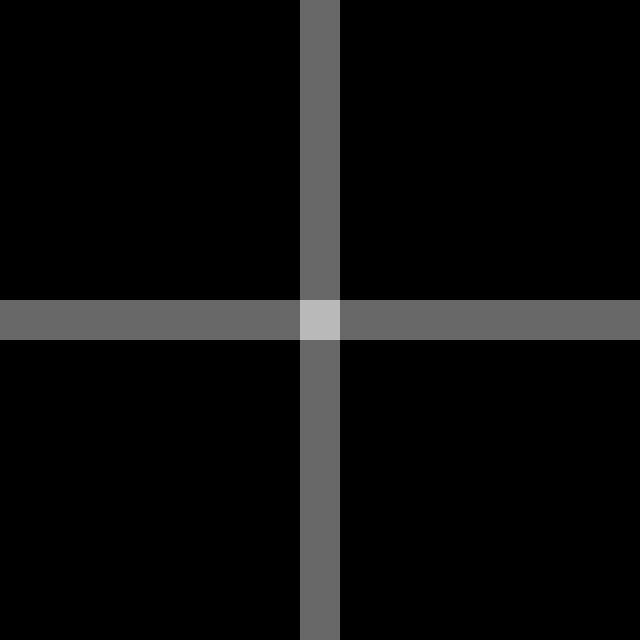

In [40]:
img1 = np.zeros(shape=(640, 640, 3), dtype=np.uint8)
img2 = np.zeros(shape=(640, 640, 3), dtype=np.uint8)
img1[:, 300:340, 0] = 255
img2[300:340, :, 1] = 255

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
#img2 = img2.transpose((1, 0, 2))
dif = np.zeros(shape=(640, 640, 1), dtype=np.uint8)
dif[:] = hsv_err(img1.astype(float), img2.astype(float)).reshape((640, 640, 1))*255
print(np.max(dif))
cv2.imwrite(path_to_save+"tmp2.jpg", dif)
Image.open("/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/imgs_w_masks/tmp2.jpg")

## SSIM AND MSE

In [208]:
from skimage.metrics import structural_similarity as ssim

mask = cv2.imread("/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/imgs_w_masks/avg_mask.jpg")
aver_image = cv2.imread("/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/imgs_w_masks/avg_img.jpg") #, cv2.IMREAD_GRAYSCALE)

aver_image = cv2.cvtColor(aver_image, cv2.COLOR_BGR2HSV)
where_to_save = "/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/hsv/"
inds = np.where(mask > 127)[:2] #[:3]
print(inds)
for img_path in sorted(os.listdir(path_to_imgs)):
    dif_img = np.zeros(shape=(640, 640*2, 3), dtype=np.uint8)
    dif = np.zeros(shape=(640, 640), dtype=np.uint8)
    img = cv2.imread(path_to_imgs+img_path) #, cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #print(np.max(img[:, :, 2]))
    h, w, rgb = img.shape
     #h, w= img.shape
    img = img[:, (w - h) // 2:(w + h) // 2]
    img = cv2.resize(img, (640, 640), interpolation=cv2.INTER_CUBIC)
    #score, diff = ssim(aver_image[inds], img[inds], full=True)
    #score = np.sum((aver_image[inds] - img[inds]) ** 2)

    #score/=len(inds[0])
    #print(score, diff)
    ret = hsv_err(img[inds],aver_image[inds])
    print(ret.shape)
    dif[inds] = ret
    score = (dif[inds]).sum()/len(inds[0])
    #print(np.min(dif))
    #dif[:, :640, :] = dif[:, :640, :].sum(axis=2)/3
    #print(dif.shape)
    img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
    dif_img[:, 640:, :] = img
    dif_img[:, :640,:] = dif.reshape((640, 640, 1))*255
    #o_inds =  np.where(dif < 127)
    #dif[changed_inds] = 0
    cv2.imwrite(where_to_save+img_path.replace(".jpg", f"_{score:.03f}.jpg"), dif_img)
#Image.open("/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/hsv/tmp.jpg")
#plt.imshow(img, ) #[:, :, :])


(array([233, 233, 233, ..., 510, 510, 510]), array([230, 230, 230, ..., 225, 225, 225]))
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230)
(1, 67230

In [121]:
mask = cv2.imread("/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/imgs_w_masks/avg_mask.jpg")
aver_image = cv2.imread("/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/imgs_w_masks/avg_img.jpg") #, cv2.IMREAD_GRAYSCALE)

aver_image = cv2.cvtColor(aver_image, cv2.COLOR_BGR2HSV)
where_to_save = "/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/hsv/"
inds = np.where(mask > 127)[:2] #[:3]
print(max(inds[0]), min(inds[0]), max(inds[1]), min(inds[1]))

##inds = (223:520, 87:348, :)
for img_path in sorted(os.listdir(path_to_imgs)):
    dif_img = np.zeros(shape=(640, 640*2, 3), dtype=np.uint8)
    dif = np.zeros(shape=(640, 640), dtype=np.uint8)
    img = cv2.imread(path_to_imgs+img_path) 
    h, w, rgb = img.shape
    img = img[:, (w - h) // 2:(w + h) // 2]
    img = cv2.resize(img, (640, 640), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    ret = hsv_err(img[inds].astype(float),aver_image[inds].astype(float))
    
    
    print(ret.shape, np.max(ret))
    dif[inds] = ret*1000
    dif = cv2.blur(dif, (5, 5))
    # o_inds =  np.where(dif < 127)
    # dif[inds] = 255
    # dif[o_inds] = 0
    score = (dif[inds]).sum()/len(inds)/1000000
    img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)
    dif_img[:, 640:, :] = img
    dif_img[:, :640,:] = dif.reshape((640, 640, 1))
    #o_inds =  np.where(dif < 127)
    #dif[o_inds] = 0
    #dif_img[:, 640:,:] += dif.reshape((640, 640, 1))*10000
    
    cv2.imwrite(where_to_save+img_path.replace(".jpg", f"_{score:.03f}.jpg"), dif_img)
#Image.open("/home/popovpe/Projects/WaterTrain/owl.guard.cv/cyclops/training/tkrs/tools/hsv/tmp.jpg")
#plt.imshow(img, ) #[:, :, :])

510 233 338 97
(67230,) 1.1523525601647648
(67230,) 1.1207299329510336
(67230,) 1.132140371978822
(67230,) 1.1299114855186174
(67230,) 1.1308494945890113
(67230,) 1.1924536919605588
(67230,) 1.221554464400318
(67230,) 1.2376574159808984
(67230,) 1.2445047450772466
(67230,) 1.2400925313152662
(67230,) 1.145277793064534
(67230,) 1.168177534197647
(67230,) 1.2078495034209618
(67230,) 1.201053610098695
(67230,) 1.4411311149378219
(67230,) 1.5043138013482833
(67230,) 1.4973729472667416
(67230,) 1.4818482015715635
(67230,) 1.4798367205744793
(67230,) 1.5040292002523536
(67230,) 1.419021372499786
(67230,) 1.471602034723058
(67230,) 1.2336662572326074
(67230,) 1.2215077720926941
(67230,) 1.1989751824645245
(67230,) 1.1656339283856094
(67230,) 1.2038563521778527
(67230,) 1.1521468474503647
(67230,) 1.1505230802795496
(67230,) 1.17744550536721
(67230,) 1.1560427455176652
(67230,) 1.1417883424704631
(67230,) 1.1679986782430516
(67230,) 1.1458166777610186
(67230,) 1.182883451437479
(67230,) 1.2763